In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score

In [9]:
df = pd.read_csv("dataset_full.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [10]:
df.columns.tolist()

['qty_dot_url',
 'qty_hyphen_url',
 'qty_underline_url',
 'qty_slash_url',
 'qty_questionmark_url',
 'qty_equal_url',
 'qty_at_url',
 'qty_and_url',
 'qty_exclamation_url',
 'qty_space_url',
 'qty_tilde_url',
 'qty_comma_url',
 'qty_plus_url',
 'qty_asterisk_url',
 'qty_hashtag_url',
 'qty_dollar_url',
 'qty_percent_url',
 'qty_tld_url',
 'length_url',
 'qty_dot_domain',
 'qty_hyphen_domain',
 'qty_underline_domain',
 'qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_at_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain',
 'qty_vowels_domain',
 'domain_length',
 'domain_in_ip',
 'server_client_domain',
 'qty_dot_directory',
 'qty_hyphen_directory',
 'qty_underline_directory',
 'qty_slash_directory',
 'qty_questionmark_directory',
 'qty_equal_directory',
 'qty_at_directory',
 'qty_and_dir

# Checking For Missing Values

In [11]:
df.isnull().sum().tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

There are no missing values in this dataset.

# Checking For Outliers

In [12]:
# Calculating Q1, Q3, and IQR for each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Identifying outliers
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df_outliers = df[outliers]

df_outliers

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
5,1,0,0,2,0,0,0,0,0,0,...,1,3,3,3591,1,0,0,0,0,1
7,2,0,0,3,0,0,0,0,0,0,...,1,2,1,3134,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88640,2,0,0,0,0,0,0,0,0,0,...,1,8,5,21,1,1,0,0,0,0
88641,2,1,0,0,0,0,0,0,0,0,...,1,2,1,146,1,2,0,0,0,0
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0


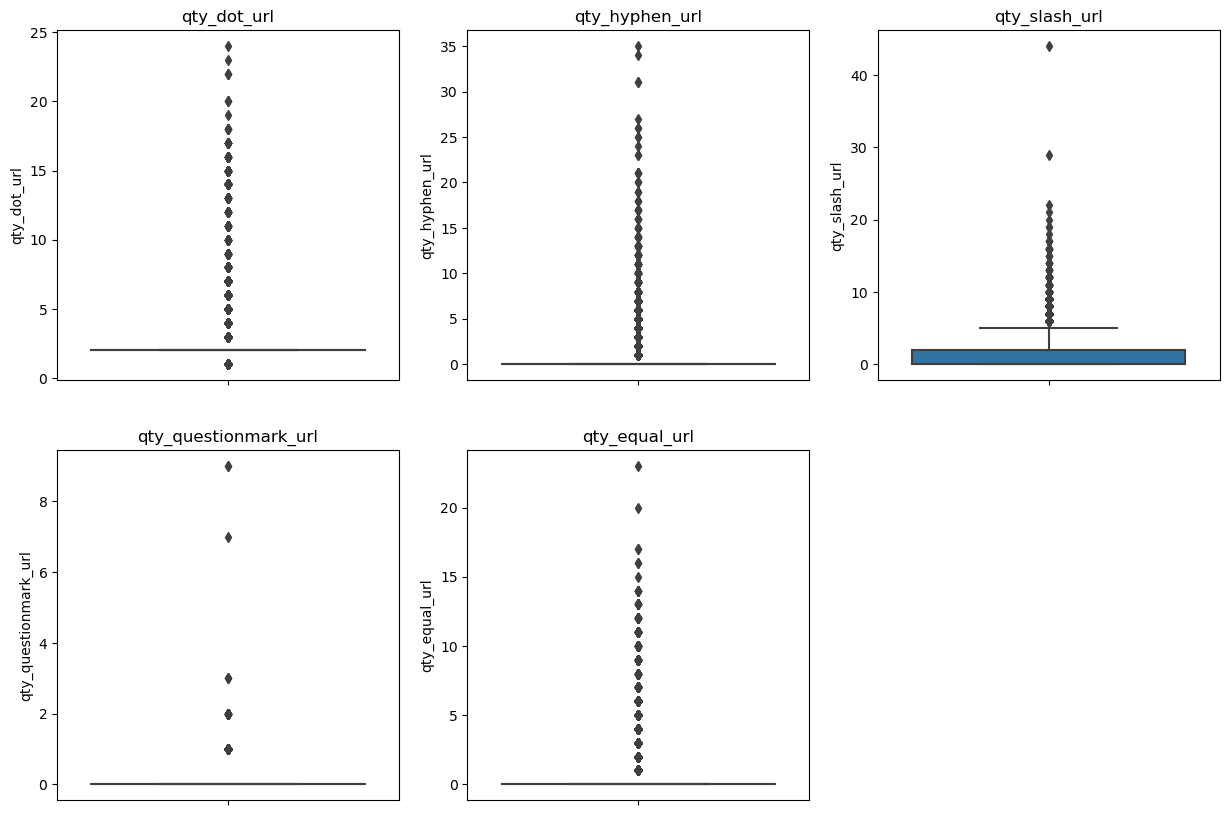

In [13]:
# Columns seleceted based on their variance and relevance to phishing
selected_columns = ['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url']
df_selected = df[selected_columns]

# Boxplots of columns selected
plt.figure(figsize=(15, 10))
for i, col in enumerate(df_selected.columns):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.show()


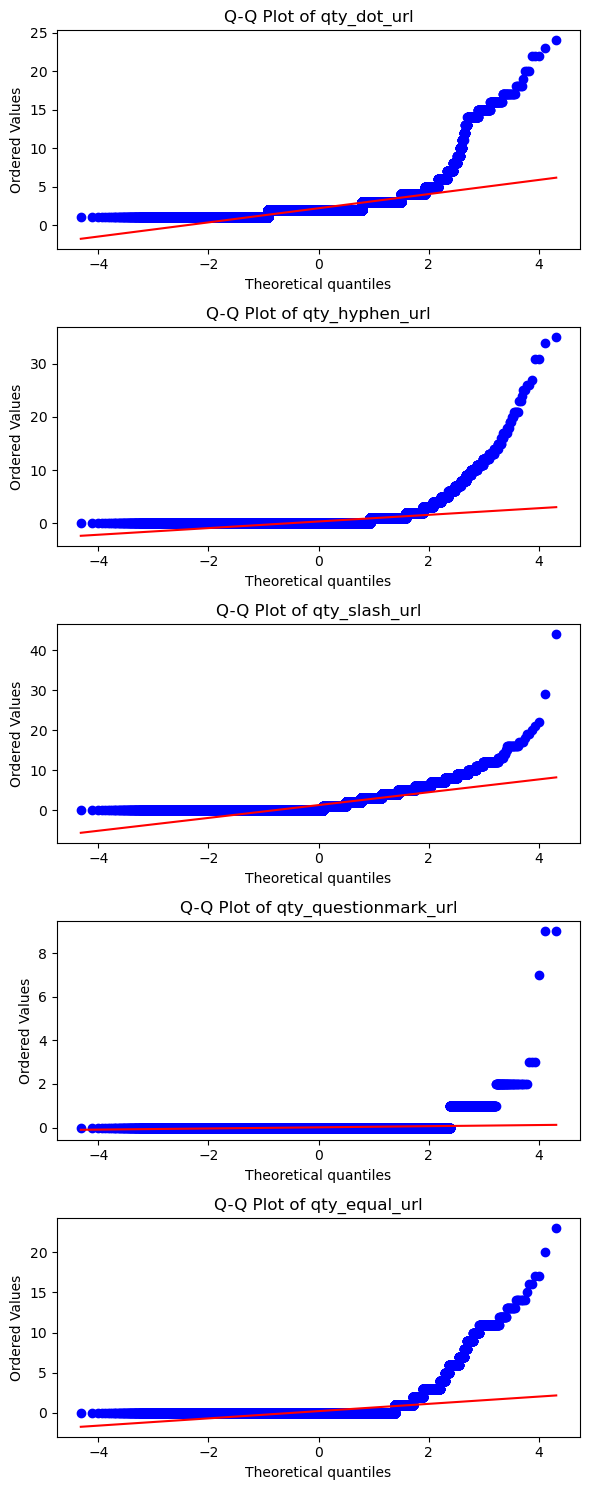

In [14]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Selected columns for Q-Q plot visualization
selected_columns = ['qty_dot_url', 'qty_hyphen_url', 'qty_slash_url', 'qty_questionmark_url', 'qty_equal_url']

# Adjust the figure size to make the plots smaller
plt.figure(figsize=(6, 15))  # Smaller width and height
for i, col in enumerate(selected_columns):
    plt.subplot(5, 1, i + 1)  # 5 rows, 1 column, ith plot
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()

### Outlier Explanation

There are a large number of outliers in the dataset with 75209.

Inference:
In terms of cybersecurity, especially in phishing detection, outliers like this can represent real scenarios. The outliers represented above might include phishing attempts that do not follow typical URL patterns. Removing these outliers could lead to a model that fails to identify less common but more dangerous threats.

Since there is a large amount of outliers, they hold a statistically significant portion of the data. Removing or modifying the data to account for the outliers could result in a loss of a significant amount of information. This could also lead to skewed results or create potential biases.

Test:
We will create 3 different instances of our models
- One with no changes to outliers
- One with median or modal imputation to outliers for numeric and categorical data respectively
- One where all outliers are dropped

# Data Visualizations

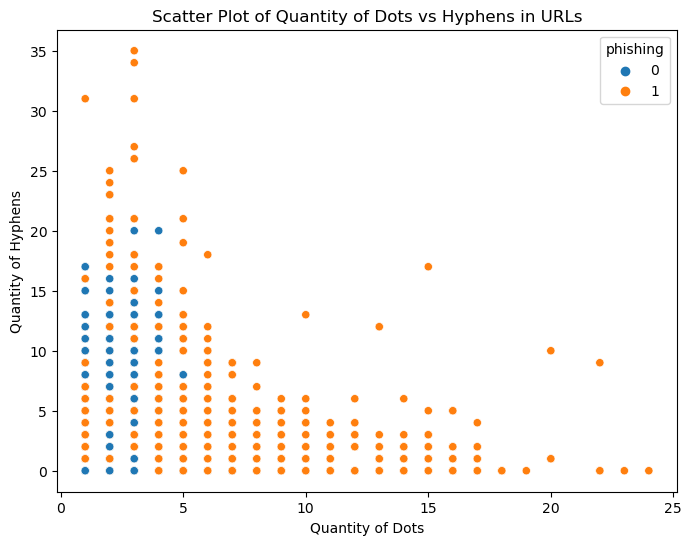

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='qty_dot_url', y='qty_hyphen_url', hue='phishing', data=df)
plt.title('Scatter Plot of Quantity of Dots vs Hyphens in URLs')
plt.xlabel('Quantity of Dots')
plt.ylabel('Quantity of Hyphens')
plt.show()

A scatter plot of the two features Quantity of Hyphens and Dots in both phishing and legitimate sites.

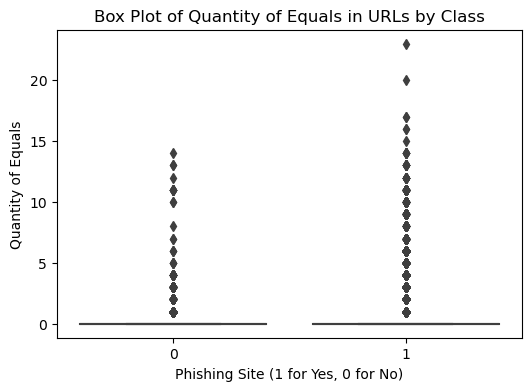

In [16]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='phishing', y='qty_equal_url', data=df)
plt.title('Box Plot of Quantity of Equals in URLs by Class')
plt.xlabel('Phishing Site (1 for Yes, 0 for No)')
plt.ylabel('Quantity of Equals')
plt.show()

Box plots showing the quantity of equal signs in Phishing vs Legitimate sites. Plots show the median, quartiles, and outliers for both.

# Transforming Data

In [22]:
# Counting the number of -1 values in each numeric column
numeric_columns = df.select_dtypes(include=np.number)
minus_one_counts = (numeric_columns == -1).sum()
minus_one_counts.head(-1)

qty_dot_url                0
qty_hyphen_url             0
qty_underline_url          0
qty_slash_url              0
qty_questionmark_url       0
                        ... 
tls_ssl_certificate        0
qty_redirects           6949
url_google_index          90
domain_google_index       88
url_shortened              0
Length: 111, dtype: int64

### Replacing -1s with zeros and creating new boolean columns for missing data

In [23]:
missing_value_indicators = df == -1

missing_value_indicators = missing_value_indicators.add_suffix('_missing')

combined_data = pd.concat([df, missing_value_indicators], axis=1)
combined_data = combined_data.replace(-1, 0)

### Removed boolean columns that only contain a single value

In [24]:
columns_to_remove = combined_data.columns[combined_data.nunique() == 1]

combined_data_cleaned = combined_data.drop(columns=columns_to_remove)

combined_data_cleaned.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.186797,2.772412,1.742428,6159.927758,0.506447,0.422293,0.002425,0.003012,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.796456,1.322999,1.706705,11465.556814,0.499961,0.689952,0.049188,0.054799,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.000000,1.000000,1.000000,1.000000


# Training Models

In [25]:
X= combined_data_cleaned.drop(columns='phishing')
Y=combined_data_cleaned['phishing']
Y=pd.DataFrame(Y)

In [26]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=2)

### Scaling data

In [27]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Model Generation (No change to outliers)
 ## Logistic Regression & Random Forest


In [38]:
X = combined_data_cleaned.drop(columns='phishing')
Y = combined_data_cleaned['phishing']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


log = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=2)


def cross_validate_with_scaling(model, X, Y, cv):
    acc_scores = []
    auc_scores = []
    confusion_matrices = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, Y_train)
        predictions = model.predict(X_test_scaled)

        acc_scores.append(accuracy_score(Y_test, predictions))
        auc_scores.append(roc_auc_score(Y_test, predictions))
        confusion_matrices.append(confusion_matrix(Y_test, predictions))


    mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
    return np.mean(acc_scores), np.mean(auc_scores), mean_confusion_matrix

log_acc, log_auc, log_conf_matrix = cross_validate_with_scaling(log, X, Y, cv)
rf_acc, rf_auc, rf_conf_matrix = cross_validate_with_scaling(rf, X, Y, cv)



In [42]:
def calculate_percentage_confusion_matrix(conf_matrix):
    total = np.sum(conf_matrix)
    percentage_matrix = (conf_matrix / total) * 100
    return percentage_matrix


percentage_log_conf_matrix = calculate_percentage_confusion_matrix(log_conf_matrix)
percentage_rf_conf_matrix = calculate_percentage_confusion_matrix(rf_conf_matrix)

print(percentage_log_conf_matrix)
print(percentage_rf_conf_matrix)



[[61.86108949  3.56695658]
 [ 3.05255677 31.51939716]]
[[63.8713098   1.55673627]
 [ 1.34465915 33.22729478]]


### Feature Importance Plot For RF


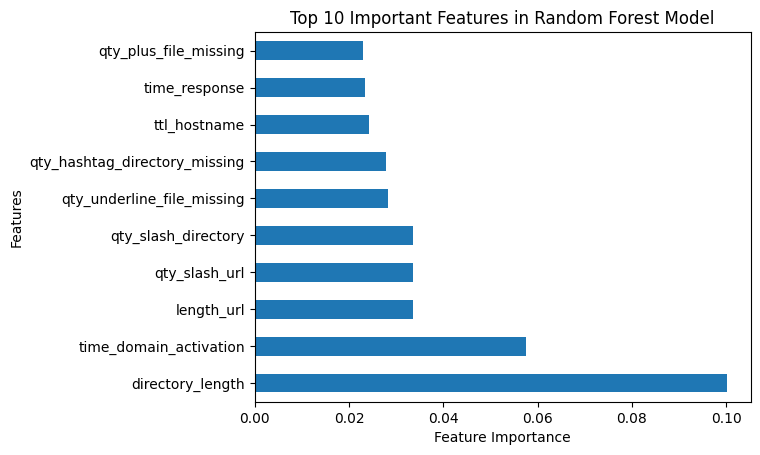

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rf_full = RandomForestClassifier(n_estimators=100, random_state=2)
rf_full.fit(X_scaled, Y)


feature_importances = pd.Series(rf_full.feature_importances_, index=X.columns)

top_10_features = feature_importances.nlargest(10)
top_10_features.plot(kind='barh')
plt.title('Top 10 Important Features in Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

Bar graph representing the Top 10 Important Features used in the Random Forest Model

# Evaluating Models

In [30]:
evaluation = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Average Accuracy": [log_acc, rf_acc],
    "Average AUC Score": [log_auc, rf_auc]
}
evaluation_df = pd.DataFrame(evaluation)
print(evaluation_df)

                 Model  Average Accuracy  Average AUC Score
0  Logistic Regression          0.933805           0.928593
1        Random Forest          0.970986           0.968656


# Model Generation (Dropping outliers)
 ## Logistic Regression & Random Forest


In [31]:
def drop_outliers(df, threshold=3):
    z_scores = np.abs(df.apply(zscore))

    df_clean = df[(z_scores < threshold).all(axis=1)]
    return df_clean


In [ ]:
X = combined_data_cleaned.drop(columns='phishing')
Y = combined_data_cleaned['phishing']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


log = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=2)


def cross_validate_with_scaling_drop_training_outliers(model, X, Y, cv):
    acc_scores = []
    auc_scores = []
    confusion_matrices = []

    for train_index, test_index in cv.split(X, Y):
        X_test = X.iloc[test_index]
        X_train = drop_outliers(X.iloc[train_index])
        Y_test = Y.iloc[test_index]
        Y_train = Y.iloc[train_index][X_train.index]

        if X_train.empty or Y_train.empty:
            continue

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, Y_train)
        predictions = model.predict(X_test_scaled)

        acc_scores.append(accuracy_score(Y_test, predictions))
        auc_scores.append(roc_auc_score(Y_test, predictions))
        confusion_matrices.append(confusion_matrix(Y_test, predictions))

    mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
    return np.mean(acc_scores), np.mean(auc_scores), mean_confusion_matrix

log_acc, log_auc, log_conf_matrix = cross_validate_with_scaling_drop_training_outliers(log, X, Y, cv)
rf_acc, rf_auc, rf_conf_matrix = cross_validate_with_scaling_drop_training_outliers(rf, X, Y, cv)


In [33]:
evaluation = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Average Accuracy": [log_acc, rf_acc],
    "Average AUC Score": [log_auc, rf_auc]
}
evaluation_df = pd.DataFrame(evaluation)
print(evaluation_df)

                 Model  Average Accuracy  Average AUC Score
0  Logistic Regression          0.910234           0.902895
1        Random Forest          0.953425           0.952145


# Model Generation (Mean and modal imputation on outliers)
 ## Logistic Regression & Random Forest


In [34]:
def median_impute_outliers(df, threshold=3):
    df = df.copy()
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in numeric_cols:
        df_col = df[col]
        z_scores = np.abs(zscore(df_col))
        median = df_col.median()


        outlier_indices = df_col.index[z_scores > threshold]
        df.loc[outlier_indices, col] = median

    return df
def modal_impute_outliers(df, threshold=3):
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in cat_cols:
        mode = df[col].mode()[0]
        counts = df[col].value_counts()
        rare_values = counts[counts < threshold].index
        df[col] = df[col].replace(rare_values, mode)

    return df

In [35]:
X = combined_data_cleaned.drop(columns='phishing')
Y = combined_data_cleaned['phishing']

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=2)


log = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=2)

def cross_validate_with_scaling_impute_training_outliers(model, X, Y, cv):
    acc_scores = []
    auc_scores = []
    confusion_matrices = []

    for train_index, test_index in cv.split(X, Y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

        X_train = median_impute_outliers(X_train)
        X_train = modal_impute_outliers(X_train)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled, Y_train)
        predictions = model.predict(X_test_scaled)

        acc_scores.append(accuracy_score(Y_test, predictions))
        auc_scores.append(roc_auc_score(Y_test, predictions))
        confusion_matrices.append(confusion_matrix(Y_test, predictions))


    mean_confusion_matrix = np.mean(confusion_matrices, axis=0)
    return np.mean(acc_scores), np.mean(auc_scores), mean_confusion_matrix


log_acc, log_auc, log_conf_matrix = cross_validate_with_scaling_impute_training_outliers(log, X, Y, cv)
rf_acc, rf_auc, rf_conf_matrix = cross_validate_with_scaling_impute_training_outliers(rf, X, Y, cv)

In [36]:
evaluation = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Average Accuracy": [log_acc, rf_acc],
    "Average AUC Score": [log_auc, rf_auc]
}
evaluation_df = pd.DataFrame(evaluation)
print(evaluation_df)

                 Model  Average Accuracy  Average AUC Score
0  Logistic Regression          0.914707           0.903981
1        Random Forest          0.967748           0.965736


In [37]:
print(log_conf_matrix)

[[10889.4   710.6]
 [  801.6  5327.8]]
